## Price Range vs. Online Delivery and Table Booking

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Created contingency tables
online_delivery_table = pd.crosstab(df['Price range'], df['Has Online delivery'])
table_booking_table = pd.crosstab(df['Price range'], df['Has Table booking'])

# Performed chi-squared tests
chi2_online_delivery, p_online_delivery, _, _ = chi2_contingency(online_delivery_table)
chi2_table_booking, p_table_booking, _, _ = chi2_contingency(table_booking_table)

print(f"Chi-squared test for online delivery: chi2={chi2_online_delivery:.2f}, p-value={p_online_delivery:.2e}")
print(f"Chi-squared test for table booking: chi2={chi2_table_booking:.2f}, p-value={p_table_booking:.2e}")


Chi-squared test for online delivery: chi2=721.38, p-value=4.86e-156
Chi-squared test for table booking: chi2=2821.58, p-value=0.00e+00


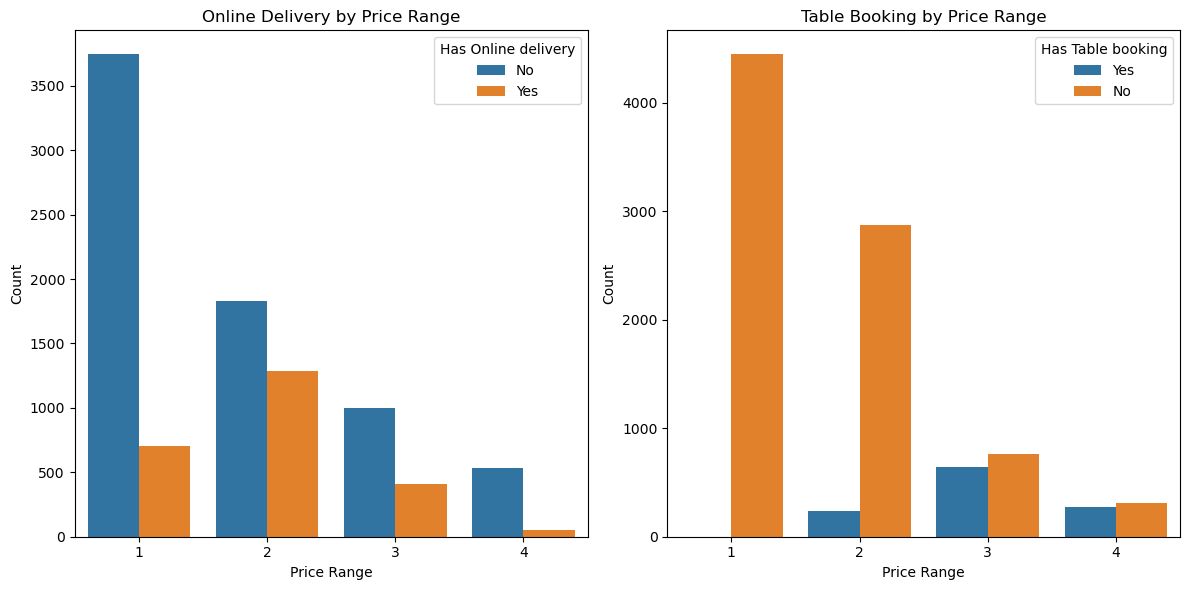

In [7]:
# Visualized the relationships using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Price range', hue='Has Online delivery', data=df)
plt.title('Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Price range', hue='Has Table booking', data=df)
plt.title('Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Determine if higher-priced restaurants are more likely to offer these services

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Converted the 'Has Online delivery' and 'Has Table booking' to binary values
df['Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Grouped by price range and calculated the proportion of restaurants offering these services
price_range_delivery = df.groupby('Price range')['Online Delivery'].mean()
price_range_booking = df.groupby('Price range')['Table Booking'].mean()

# Created a DataFrame for visualization
services_proportion = pd.DataFrame({
    'Online Delivery': price_range_delivery,
    'Table Booking': price_range_booking
}).reset_index()

# Printed the proportion of services offered in each price range
print(services_proportion) 

   Price range  Online Delivery  Table Booking
0            1         0.157741       0.000225
1            2         0.413106       0.076775
2            3         0.291903       0.457386
3            4         0.090444       0.467577


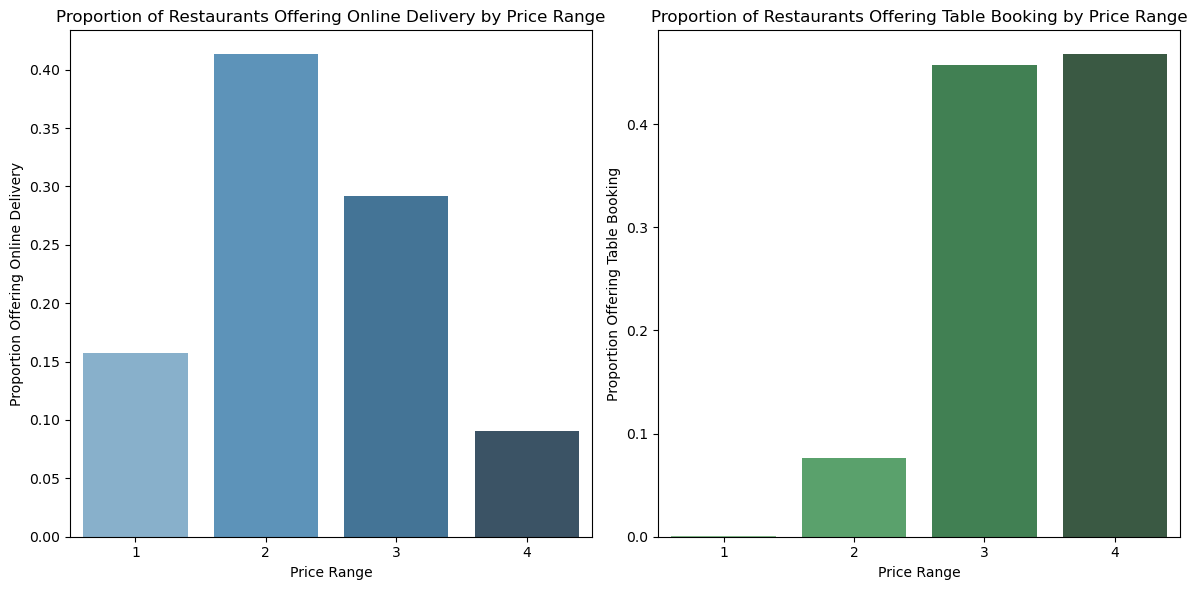

In [13]:
# Visualized the results using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Price range', y='Online Delivery', data=services_proportion, palette='Blues_d')
plt.title('Proportion of Restaurants Offering Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion Offering Online Delivery')

plt.subplot(1, 2, 2)
sns.barplot(x='Price range', y='Table Booking', data=services_proportion, palette='Greens_d')
plt.title('Proportion of Restaurants Offering Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion Offering Table Booking')

plt.tight_layout()
plt.show()